<a href="https://colab.research.google.com/github/papapatcharakit/EEG-BASED-BIOMETRIC-IDENTIFICATION-SYSTEM-USING-DEEP-LEARNING-ALGORITHM/blob/main/EEG-BASED_BIOMETRIC_IDENTIFICATION_SYSTEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [ ]:
pip install mne

     |████████████████████████████████| 7.5 MB 4.4 MB/s 


In [ ]:
pip install scaleogram

In [ ]:
# import necessary packages
import numpy as np
import mne
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, LSTM
from keras.layers import Conv2D
from keras.layers import BatchNormalization, Activation, Reshape
import os
import scaleogram as scg
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#%cd /Users/papapat/Desktop/preproject/dataset/input/eeg_data_test
%cd /content/drive/MyDrive/eeg_dataset/files



/content/drive/MyDrive/eeg_dataset/files


In [ ]:
# data loading
# dataset info : BCI2000: a general - purpose brain-computer interface (BCI) system, correct from 109 participants, 14 trials, 64 channels, 160 Hz sampling freq.

SList = ["%03d"%i for i in range(1,11)] #only first 10 participants
RList = ["%02d"%i for i in range(1,15)] #all trials
Lists = []
name = []
for j in SList:
    name = 's'+str(j)
    name = np.zeros((64, 1600)) #64 channels, 10 sec
    name = np.expand_dims(name, axis=0)
    for i in RList:
        file = os.getcwd()+'/S'+str(j)+'/S'+str(j)+'R'+str(i)+'.edf'
        data = mne.io.read_raw_edf(file)
        raw_data = data.get_data()

        # 10 sec parts
        for k in range(int((np.size(raw_data,1))/1600)):
          name = np.concatenate((name, np.expand_dims(raw_data[:, (k)*1600:(k+1)*1600], axis=0)), axis=0)
        
        # free up memory
        path = []
        cwd = os.getcwd()
        file = os.getcwd()+'/S'+str(j)+'/S'+str(j)+'R'+str(i)+'.edf'
        path.append(os.path.join(cwd, file))
        # os.remove(path[0])
    name = name[1:np.size(name, 0), :, :]
    subj = 'S'+str(j)
    np.save(subj, name)


In [ ]:
# selecting Channels
SList = ["%03d"%i for i in range(1,11)] #only first 10 participants
RList = ["%02d"%i for i in range(1,15)] #all trials

# for 64 channels
channels64 = list(range(64)) #64 channels
for j in SList:
  name = 'S'+str(j)+'.npy'
  a = np.load(name)
  a = a[:, channels64, :]
  subject = 's'+str(j)
  np.save(subject, a)

In [ ]:
# train set

SList = ["%03d"%i for i in range(1,11)] #only first 10 participants
RList = ["%02d"%i for i in range(1,15)] #all trials
import numpy as np

n_ch = 64
y_train = np.zeros((1, 1))
x_train = np.zeros((1, n_ch, 1600))
for j in SList:
  # name = 's'+str(j)+'_train.npy'
  name = 's'+str(j)+'.npy'
  a = np.load(name)
  print(a.shape)
  x_train = np.concatenate((x_train, a), axis=0)
  y = (int(j)-1)*np.ones((np.size(a, 0), 1))
  print(y.shape)
  y_train = np.concatenate((y_train, y))
  print(j)
x_train = x_train[1:]
y_train = y_train[1:]
del a
del y

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
# # spectrogram
# %cd /content/drive/MyDrive/eeg_dataset/files/
# for i in range(x_train.shape[0]):
#   plt.imshow(x_train[i])
#   plt.axis('off')
#   plt.savefig('spectrogram/{0}_out{1}.png'.format(y_train[i][0],i), dpi=300, bbox_inches='tight',transparent=True, pad_inches=0)

/content/drive/MyDrive/eeg_dataset/files


In [ ]:
for i in range(x_train.shape[0]):
  print(i)

In [ ]:
# scaleogram
%cd /content/drive/MyDrive/eeg_dataset/files/


for i in range(x_train.shape[0]):
  coikw = {'alpha': 0.5, 'hatch': '/'}
  for ch in [31,35,48,52]:
    scg.cws(x_train[i][ch], coikw=coikw,coi=False,cbar=None)
    plt.axis('off')
    plt.title('')
    plt.savefig('scaleogram/{0}_out{1}_{2}.jpg'.format(y_train[i][0],i+1404,ch), bbox_inches='tight',transparent=True, pad_inches=0)


In [ ]:
x_train.shape

(468, 64, 1600)

# Load images

In [ ]:
import glob
%cd /content/drive/MyDrive/eeg_dataset/files/scaleogram/
paths = glob.glob('./[0-9].0_*.jpg')

/content/drive/MyDrive/eeg_dataset/files/scaleogram


In [ ]:
paths

['./9.0_out1460_31.jpg',
 './9.0_out1460_35.jpg',
 './9.0_out1460_48.jpg',
 './9.0_out1461_31.jpg',
 './9.0_out1460_52.jpg',
 './9.0_out1461_48.jpg',
 './9.0_out1461_35.jpg',
 './9.0_out1462_31.jpg',
 './9.0_out1461_52.jpg',
 './9.0_out1462_35.jpg',
 './9.0_out1462_48.jpg',
 './9.0_out1462_52.jpg',
 './9.0_out1463_31.jpg',
 './9.0_out1463_35.jpg',
 './9.0_out1463_48.jpg',
 './9.0_out1463_52.jpg',
 './9.0_out1464_31.jpg',
 './9.0_out1464_35.jpg',
 './9.0_out1464_48.jpg',
 './9.0_out1464_52.jpg',
 './9.0_out1465_31.jpg',
 './9.0_out1465_35.jpg',
 './9.0_out1465_48.jpg',
 './9.0_out1465_52.jpg',
 './9.0_out1466_31.jpg',
 './9.0_out1466_35.jpg',
 './9.0_out1466_48.jpg',
 './9.0_out1466_52.jpg',
 './9.0_out1467_31.jpg',
 './9.0_out1467_35.jpg',
 './9.0_out1467_48.jpg',
 './9.0_out1467_52.jpg',
 './9.0_out1468_31.jpg',
 './9.0_out1468_35.jpg',
 './9.0_out1468_48.jpg',
 './9.0_out1468_52.jpg',
 './9.0_out1469_31.jpg',
 './9.0_out1469_35.jpg',
 './9.0_out1469_48.jpg',
 './9.0_out1469_52.jpg',


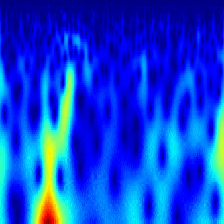

In [ ]:
from tensorflow.keras.utils import load_img
load_img(paths[0],target_size=(224,224))

In [ ]:
paths = np.array(paths)
np.random.shuffle(paths)

In [ ]:
paths

array(['./7.0_out1111_48.jpg', './8.0_out1279_48.jpg',
       './5.0_out883_48.jpg', ..., './1.0_out224_48.jpg',
       './9.0_out1437_31.jpg', './8.0_out1271_48.jpg'], dtype='<U20')

In [ ]:
len(paths)

6240

In [ ]:
paths[:6]

array(['./3.0_out568_52.jpg', './4.0_out688_31.jpg',
       './7.0_out1190_48.jpg', './1.0_out257_48.jpg',
       './9.0_out1552_31.jpg', './8.0_out1374_31.jpg'], dtype='<U20')

In [ ]:
%cd /content/drive/MyDrive/eeg_dataset/files/scaleogram/
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

size = (224,224)
specgrams = []
labels = []

for path in paths:
    #print(path)
    specgrams.append(img_to_array((load_img(path, target_size = size))))
    # get labels from file name 
    labels.append(float(path.replace('./','').split("_")[0]))

/content/drive/MyDrive/eeg_dataset/files/scaleogram


In [ ]:
labels[:20]

[7.0,
 8.0,
 5.0,
 6.0,
 8.0,
 7.0,
 4.0,
 4.0,
 4.0,
 6.0,
 9.0,
 7.0,
 2.0,
 9.0,
 4.0,
 3.0,
 4.0,
 9.0,
 6.0,
 2.0]

# Models

In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.vgg16 import preprocess_input
# preprocessing input
specgrams = np.array(specgrams)
specgrams = preprocess_input(specgrams)
labels = to_categorical(labels, num_classes=10)


In [ ]:
from keras.applications.resnet import ResNet50, preprocess_input
from keras.applications.resnet import preprocess_input
# preprocessing input
specgrams = np.array(specgrams)
specgrams = preprocess_input(specgrams)
labels = to_categorical(labels, num_classes=10)

In [ ]:
from keras.applications.resnet import ResNet152, preprocess_input
from keras.applications.resnet import preprocess_input
# preprocessing input
specgrams = np.array(specgrams)
specgrams = preprocess_input(specgrams)
labels = to_categorical(labels, num_classes=10)

In [ ]:
# manually train test split
le = len(paths) 
test_size = 624
train_size = le - test_size

x_train = specgrams[:train_size]
y_train = labels[:train_size]

x_test = specgrams[train_size:]
y_test = labels[train_size:]

In [ ]:
# VGG16
from tensorflow.keras import Input
base_model = VGG16(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))
#base_model = VGG16()

for layer in base_model.layers:
  layer.trainable = False

flatten_layer = Flatten()
dense_layer_1 = Dense(512, activation='relu')
dense_layer_2 = Dense(256, activation='relu')
drop_layer_1 = Dropout(0.5)
prediction_layer = Dense(10, activation='softmax')


model = Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    #drop_layer_1,
    prediction_layer
])

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
# ResNet50
from tensorflow.keras import Input
base_model = ResNet50(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))


for layer in base_model.layers:
  layer.trainable = False

flatten_layer = Flatten()
dense_layer_1 = Dense(512, activation='relu')
dense_layer_2 = Dense(256, activation='relu')
drop_layer_1 = Dropout(0.5)
prediction_layer = Dense(10, activation='softmax')


model = Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    #drop_layer_1,
    prediction_layer
])



94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
# ResNet152
from tensorflow.keras import Input
base_model = ResNet152(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))


for layer in base_model.layers:
  layer.trainable = False

flatten_layer = Flatten()
dense_layer_1 = Dense(512, activation='relu')
dense_layer_2 = Dense(256, activation='relu')
drop_layer_1 = Dropout(0.5)
prediction_layer = Dense(10, activation='softmax')


model = Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    #drop_layer_1,
    prediction_layer
])

234708992/234698864 [==============================] - 7s 0us/step


In [ ]:
from keras.callbacks import EarlyStopping
#from tensorflow.keras import optimizers

model.compile(
    optimizer='Ftrl',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


#es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

y_train = np.array(y_train)
hist = model.fit(x_train, y_train, epochs=30, validation_split=0.2, batch_size=5, callbacks=[])

Epoch 1/30
899/899 [==============================] - 34s 27ms/step - loss: 1.0125 - accuracy: 0.6632 - val_loss: 0.6134 - val_accuracy: 0.7883
Epoch 2/30
899/899 [==============================] - 23s 26ms/step - loss: 0.4226 - accuracy: 0.8633 - val_loss: 0.4573 - val_accuracy: 0.8425
Epoch 3/30
899/899 [==============================] - 23s 25ms/step - loss: 0.2608 - accuracy: 0.9265 - val_loss: 0.3761 - val_accuracy: 0.8692
Epoch 4/30
899/899 [==============================] - 23s 25ms/step - loss: 0.1758 - accuracy: 0.9557 - val_loss: 0.3428 - val_accuracy: 0.8737
Epoch 5/30
899/899 [==============================] - 23s 25ms/step - loss: 0.1199 - accuracy: 0.9751 - val_loss: 0.2944 - val_accuracy: 0.8906
Epoch 6/30
899/899 [==============================] - 23s 25ms/step - loss: 0.0831 - accuracy: 0.9853 - val_loss: 0.2767 - val_accuracy: 0.8897
Epoch 7/30
899/899 [==============================] - 23s 25ms/step - loss: 0.0587 - accuracy: 0.9931 - val_loss: 0.2745 - val_accuracy:

In [ ]:
del model

In [ ]:
score_train = model.evaluate(x_train, y_train, verbose=0)
score_test = model.evaluate(x_test, y_test, verbose=0)
print("mean train accuracy is:   ", (score_train[1]))
print("mean test accuracy is:   ", (score_test[1]))

In [ ]:
print(hist.history.keys())
print(hist.history['accuracy'])
print(hist.history['val_accuracy'])
print(hist.history['loss'])
print(hist.history['val_loss'])
x = hist.history['val_accuracy']
import statistics
print(statistics.mean(x))

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
[0.6605075597763062, 0.9098396897315979, 0.972172737121582, 0.9910953044891357, 0.9962155222892761, 0.9984416961669922, 0.9991095066070557, 0.9995547533035278, 0.9997773766517639, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.6788256168365479, 0.8843416571617126, 0.9074733257293701, 0.913701057434082, 0.9163700938224792, 0.9234875440597534, 0.9190391302108765, 0.9234875440597534, 0.9270462393760681, 0.9243772029876709, 0.9297152757644653, 0.9270462393760681, 0.9279359579086304, 0.9297152757644653, 0.9314946532249451, 0.9306049942970276, 0.9323843121528625, 0.9314946532249451, 0.9288256168365479, 0.9314946532249451, 0.9323843121528625, 0.9332740306854248, 0.9368327260017395, 0.9332740306854248, 0.9341636896133423, 0.9332740306854248, 0.935943067073822, 0.9341636896133423, 0.9350534081459045, 0.9323843121528625]
[1.0724164247512817, 0.34068378806114197, 0.151924014091

In [ ]:
import sklearn
from sklearn.metrics import f1_score, accuracy_score, jaccard_score, log_loss, auc, label_ranking_average_precision_score, coverage_error, confusion_matrix
from sklearn import metrics
import numpy as np
y_hat = model.predict(x_test)
predict_class = np.argmax(y_hat,axis=1).tolist()
actual_class = np.argmax(y_test,axis=1).tolist()
print(f1_score(actual_class,predict_class,average='micro'))
print(accuracy_score(actual_class,predict_class))
print(label_ranking_average_precision_score(y_test,y_hat))

0.9439102564102564
0.9439102564102564
0.966426282051282


In [ ]:
from keras.models import load_model
%cd /content/drive/MyDrive/eeg_dataset/files/
model.save('ResNet50_model.h5')

#model_loaded = load_model('ResNet50_model.h5')

/content/drive/MyDrive/eeg_dataset/files


In [ ]:
from keras.models import load_model
%cd /content/drive/MyDrive/eeg_dataset/files/
model.save('VGG16_model_Ftrl.h5')

#model_loaded_vgg16 = load_model('VGG16_model.h5')

/content/drive/MyDrive/eeg_dataset/files


In [ ]:
from keras.models import load_model
%cd /content/drive/MyDrive/eeg_dataset/files/
model.save('ResNet152_model.h5')

model_loaded = load_model('ResNet152_model.h5')

/content/drive/MyDrive/eeg_dataset/files


In [ ]:
from keras.models import load_model
%cd /content/drive/MyDrive/eeg_dataset/files/
model_loaded = load_model('VGG16_model_Ftrl.h5')

#VGG16_model_RMS
#VGG16_model_adam


/content/drive/MyDrive/eeg_dataset/files


In [ ]:
model.layers[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 27,694,154
Trainable params: 12,979,466
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.predict(np.expand_dims(x_train[0],axis=0))

array([[1.0000000e+00, 6.2947272e-11, 1.8921886e-10]], dtype=float32)

In [ ]:
filters, biases = model.layers[0].layers[2].get_weights()
print(filters.shape)

(7, 7, 3, 64)


conv1_conv (7, 7, 3, 64)


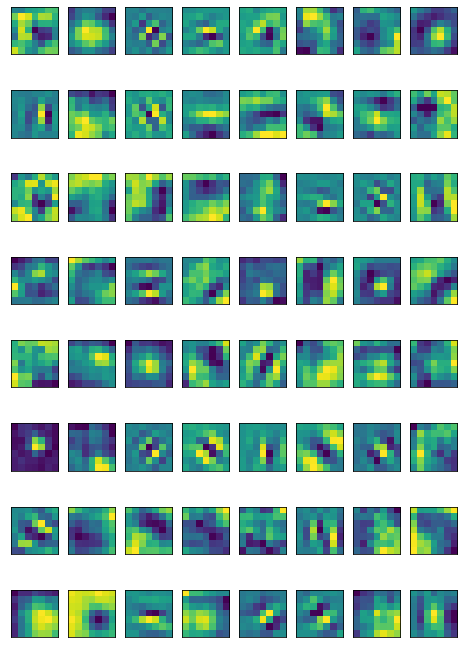

In [ ]:
layer = model.layers[0].layers 
filters, biases = model.layers[0].layers[2].get_weights()
print(layer[2].name, filters.shape)

   
# plot filters

fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='viridis') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()    

In [ ]:
from IPython.core.pylabtools import figsize
# retrieve weights from the second hidden layer
filters, biases = model.layers[0].layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

fig, axes = plt.subplots(filters.shape[3], filters.shape[0], figsize=(40,40))
for i in range(filters.shape[3]):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(filters.shape[0]):
		# specify subplot and turn of axis
		ax = axes[i,j]
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in RGB
		ax.imshow(f[:, :, j], cmap='viridis')
# show the figure
plt.show()

# Hello :)

In [ ]:
model.layers[0].layers

In [ ]:
model.layers[0].summary()

Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

In [ ]:
model.layers[0].layers[1].input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


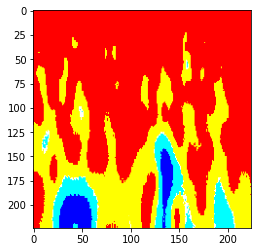

In [ ]:
plt.imshow(x_train[0])

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_15[0][0]']               
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

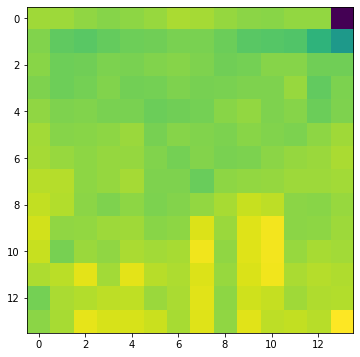

In [ ]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

md = ResNet152(weights='imagenet',include_top=False)
layer1_model = Model(inputs = md.inputs, outputs = md.layers[150].output)

layer1_model.summary()
l1_output = layer1_model.predict(np.expand_dims(x_train[0],axis=0))
fig, ax = plt.subplots(figsize=(18,6))
ax.imshow(l1_output[0,:,:,0])
print(l1_output.shape)
print(l1_output[0,:8,:8,0])

print(np.var(l1_output))
print(np.mean(l1_output))

#print(l1_output[0,:8,:8,0]) 


fig.show()

In [ ]:
gamma,beta,_,_=md.layers[3].get_weights()

In [ ]:
print(gamma[0],beta[0])

1.0913312 1.4794971


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16_input (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 27,694,154
Trainable params: 12,979,466
Non-tra

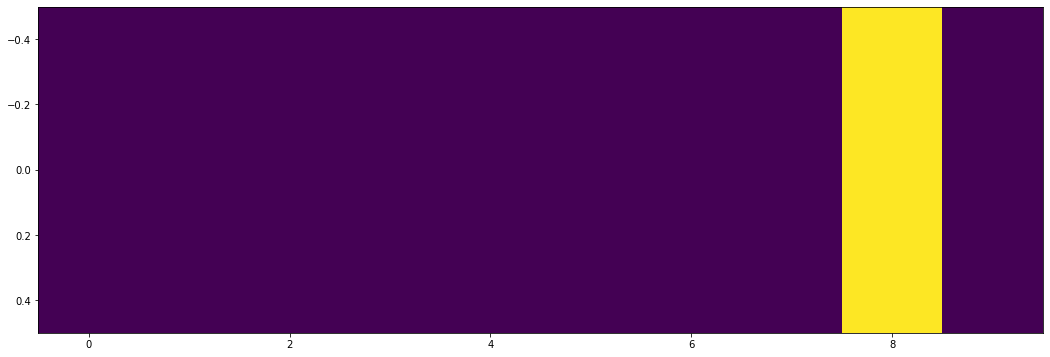

In [ ]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

#md = VGG16(weights='imagenet',include_top=False)
md = model
layer1_model = Model(inputs = md.inputs, outputs = md.layers[4].output)

layer1_model.summary()
l1_output = layer1_model.predict(np.expand_dims(x_train[0],axis=0))
fig, ax = plt.subplots(figsize=(18,6))
ax.imshow(l1_output,aspect='auto')
print(l1_output)

fig.show()


Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)     0         
                                                                 
 conv1_conv (Conv2D)         (None, None, None, 64)    9472      
                                                                 
Total params: 9,472
Trainable params: 9,472
Non-trainable params: 0
_________________________________________________________________


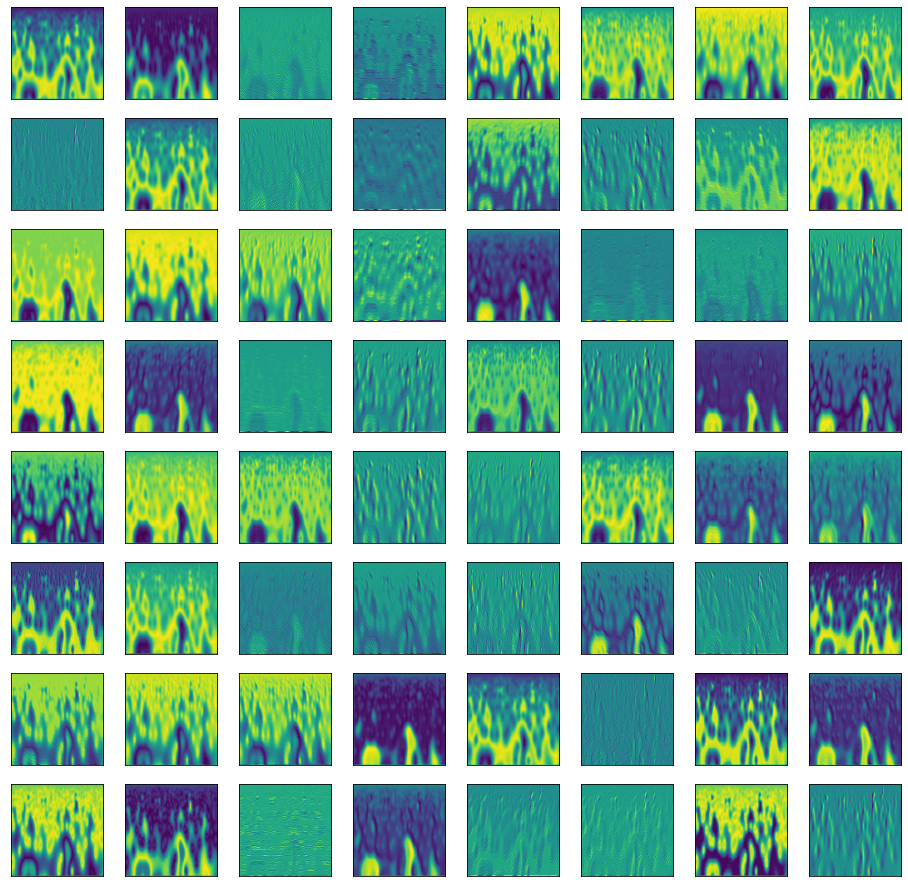

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid
# redefine model to output right after the first hidden layer
md = ResNet152(weights='imagenet',include_top=False)
layer1_model = Model(inputs = md.inputs, outputs = md.layers[2].output)

layer1_model.summary()
l1_output = layer1_model.predict(np.expand_dims(x_train[0],axis=0))

# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
plt.figure(figsize=(16,16))
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		#plt.figure(figsize=(16,16))
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(l1_output[0, :, :, ix-1], cmap='viridis')
		ix += 1
# show the figure
plt.show()

In [ ]:
l1_output.shape

(1, 224, 224, 64)

# Mean train/test accuracy

In [ ]:
# model evaluation

score_train = model.evaluate(x_train, y_train, verbose=0)
score_test = model.evaluate(x_test, y_test, verbose=0)
print("mean train accuracy is:   ", (score_train[1]))
print("mean test accuracy is:   ", (score_test[1]))



mean train accuracy is:    0.9894943237304688
mean test accuracy is:    0.9166666865348816


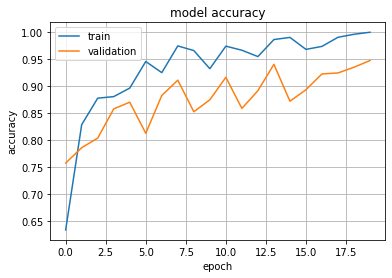

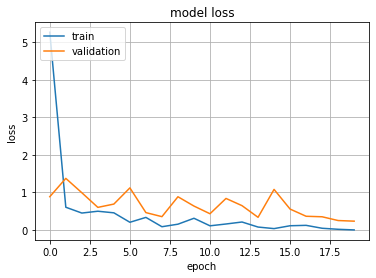

In [ ]:
# Loss and Accuracy curves

import matplotlib.pyplot as plt
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid(True)
#plt.savefig('acc8.png', dpi=600)
plt.show()

# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid(True)
#plt.savefig('loss8.png', dpi=600)
plt.show()

In [ ]:
test = model.predict(x_test)

In [ ]:
test[]

(483, 3)

#  Evaluate


In [ ]:
import sklearn
from sklearn.metrics import f1_score, accuracy_score, jaccard_score, log_loss, auc, label_ranking_average_precision_score, coverage_error, confusion_matrix
from sklearn import metrics
import numpy as np

In [ ]:
import glob
%cd /content/drive/MyDrive/eeg_dataset/files/scaleogram/
paths = glob.glob('./[0-9].0_*.jpg')

[Errno 2] No such file or directory: '/content/drive/MyDrive/eeg_dataset/files/scaleogram/'
/content


In [ ]:
paths = np.array(paths)
np.random.shuffle(paths)

In [ ]:
%cd /content/drive/MyDrive/eeg_dataset/files/scaleogram/
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

size = (224,224)
specgrams = []
labels = []

for path in paths:
    #print(path)
    specgrams.append(img_to_array((load_img(path, target_size = size))))
    # get labels from file name 
    labels.append(float(path.replace('./','').split("_")[0]))

[Errno 2] No such file or directory: '/content/drive/MyDrive/eeg_dataset/files/scaleogram/'
/content


In [ ]:
from keras.applications.resnet import ResNet50, preprocess_input
from keras.applications.resnet import preprocess_input
# preprocessing input
specgrams = np.array(specgrams)
specgrams = preprocess_input(specgrams)
labels = to_categorical(labels, num_classes=3)

KeyboardInterrupt: ignored

In [ ]:
# manually train test split
le = len(paths) 
test_size = 192
train_size = le - test_size

x_train = specgrams[:train_size]
y_train = labels[:train_size]

x_test = specgrams[train_size:]
y_test = labels[train_size:]

In [ ]:
from keras.models import load_model
%cd /content/drive/MyDrive/eeg_dataset/files/
model_loaded = load_model('ResNet152_model.h5')

/content/drive/MyDrive/eeg_dataset/files


In [ ]:
y_hat = model.predict(x_test)

In [ ]:
predict_class = np.argmax(y_hat,axis=1).tolist()
print(predict_class)

[7, 5, 6, 6, 8, 3, 4, 4, 0, 1, 3, 5, 1, 2, 4, 3, 7, 5, 9, 3, 8, 6, 6, 1, 9, 8, 2, 2, 8, 8, 4, 8, 0, 5, 8, 2, 5, 0, 9, 3, 2, 8, 5, 3, 5, 1, 6, 8, 9, 0, 7, 1, 2, 3, 9, 9, 4, 3, 7, 2, 3, 6, 8, 1, 6, 0, 8, 2, 5, 0, 3, 1, 8, 0, 4, 3, 3, 9, 3, 2, 2, 0, 5, 8, 8, 5, 8, 2, 8, 2, 5, 3, 4, 4, 8, 4, 5, 8, 2, 2, 9, 1, 4, 8, 8, 3, 4, 1, 8, 8, 9, 6, 2, 3, 8, 6, 6, 4, 1, 3, 6, 6, 8, 8, 1, 6, 6, 5, 5, 5, 5, 5, 4, 3, 8, 2, 0, 6, 8, 4, 3, 6, 5, 2, 4, 5, 3, 4, 7, 9, 5, 0, 2, 9, 9, 8, 9, 4, 5, 5, 8, 0, 5, 6, 6, 0, 2, 8, 3, 0, 4, 7, 7, 6, 9, 7, 8, 9, 0, 0, 5, 5, 1, 5, 0, 5, 2, 9, 3, 3, 5, 1, 5, 0, 5, 9, 9, 2, 4, 5, 8, 1, 1, 1, 3, 6, 6, 7, 8, 4, 6, 4, 1, 8, 5, 4, 8, 6, 2, 1, 4, 3, 6, 3, 4, 6, 3, 2, 9, 1, 9, 0, 9, 1, 7, 9, 7, 9, 0, 2, 1, 0, 2, 2, 8, 7, 0, 1, 3, 2, 5, 3, 8, 3, 3, 7, 3, 3, 6, 3, 9, 5, 8, 2, 4, 3, 4, 1, 8, 6, 8, 6, 5, 4, 1, 1, 6, 7, 2, 1, 1, 8, 7, 1, 0, 2, 9, 9, 7, 6, 0, 1, 0, 6, 1, 4, 0, 9, 4, 0, 0, 6, 2, 3, 7, 6, 4, 9, 3, 6, 8, 2, 3, 9, 7, 7, 8, 0, 7, 7, 6, 9, 4, 6, 3, 4, 3, 5, 7, 6, 3, 7, 4, 

In [ ]:
actual_class = np.argmax(y_test,axis=1).tolist()
print(actual_class)

[7, 5, 6, 6, 8, 3, 4, 4, 7, 1, 5, 5, 1, 2, 4, 7, 7, 5, 9, 3, 8, 6, 6, 1, 9, 8, 2, 2, 8, 8, 4, 8, 0, 5, 8, 2, 5, 0, 9, 5, 2, 8, 5, 7, 5, 1, 6, 8, 9, 0, 7, 1, 2, 3, 9, 9, 4, 3, 7, 2, 3, 6, 8, 1, 6, 0, 8, 2, 5, 0, 3, 1, 8, 0, 4, 2, 3, 9, 3, 2, 2, 0, 5, 8, 8, 5, 8, 2, 8, 2, 5, 3, 4, 4, 8, 4, 5, 8, 2, 2, 9, 1, 4, 8, 8, 9, 4, 1, 8, 8, 9, 6, 2, 3, 8, 6, 6, 4, 1, 3, 6, 6, 8, 8, 1, 6, 6, 5, 5, 5, 5, 5, 4, 3, 8, 2, 0, 6, 8, 4, 7, 6, 5, 2, 4, 5, 3, 4, 7, 9, 5, 0, 2, 0, 9, 8, 9, 4, 5, 5, 8, 0, 5, 6, 6, 0, 2, 8, 3, 0, 4, 9, 7, 6, 9, 7, 8, 9, 0, 0, 5, 5, 1, 3, 2, 5, 2, 9, 3, 3, 8, 1, 5, 0, 5, 9, 9, 2, 4, 5, 8, 9, 1, 1, 2, 6, 8, 7, 8, 4, 6, 4, 1, 8, 5, 4, 8, 6, 2, 1, 4, 3, 6, 2, 4, 6, 3, 2, 9, 1, 9, 0, 9, 1, 7, 9, 7, 9, 0, 2, 1, 0, 2, 2, 8, 7, 0, 7, 3, 0, 5, 3, 8, 3, 3, 7, 3, 3, 6, 3, 9, 5, 8, 2, 4, 3, 4, 1, 8, 6, 8, 6, 5, 4, 1, 1, 6, 2, 2, 1, 1, 8, 3, 1, 0, 2, 9, 7, 7, 6, 0, 9, 0, 6, 1, 4, 0, 9, 4, 0, 0, 6, 2, 3, 7, 6, 4, 9, 3, 6, 8, 2, 3, 9, 7, 7, 8, 0, 7, 7, 6, 9, 4, 6, 3, 4, 3, 5, 7, 6, 3, 7, 4, 

In [ ]:
f1_score(actual_class,predict_class,average='micro')

0.7948717948717948

In [ ]:
accuracy_score(actual_class,predict_class)

0.7948717948717948

In [ ]:
label_ranking_average_precision_score(y_test,y_hat)

0.8603365384615379

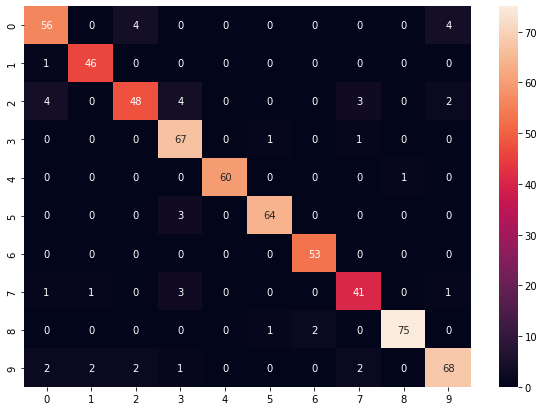

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix(actual_class,predict_class)
df_cm = pd.DataFrame(array, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(actual_class,predict_class,pos_label=0)
fnr = 1.0-tpr
eer_threshold = thresholds[np.nanargmin(np.absolute((fnr-fpr)))]
EER = fpr[np.nanargmin(np.absolute((fnr-fpr)))]

In [ ]:
print(fpr,fnr)

[0.         0.53383459 0.97744361 1.        ] [1. 1. 1. 0.]


In [ ]:
EER

0.9774436090225563

# K-fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
import numpy as np
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, LSTM
from keras.layers import Conv2D
from keras.layers import BatchNormalization, Activation, Reshape
import os
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob
%cd /content/drive/MyDrive/eeg_dataset/files/scaleogram/
paths = glob.glob('./[0-2].0_*.jpg')

/content/drive/MyDrive/eeg_dataset/files/scaleogram


In [ ]:
paths = np.array(paths)
np.random.shuffle(paths)

In [ ]:
%cd /content/drive/MyDrive/eeg_dataset/files/scaleogram/
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

size = (224,224)
specgrams = []
labels = []

for path in paths:
    #print(path)
    specgrams.append(img_to_array((load_img(path, target_size = size))))
    # get labels from file name 
    labels.append(float(path.replace('./','').split("_")[0]))

/content/drive/MyDrive/eeg_dataset/files/scaleogram


In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.vgg16 import preprocess_input
# preprocessing input
specgrams = np.array(specgrams)
specgrams = preprocess_input(specgrams)
labels = to_categorical(labels, num_classes=3)

In [ ]:
# manually train test split
le = len(paths) 
test_size = 192
train_size = le - test_size

x_train = specgrams[:train_size]
y_train = labels[:train_size]

x_test = specgrams[train_size:]
y_test = labels[train_size:]

In [ ]:
# Merge inputs and targets
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

In [ ]:
# Define the K-fold Cross Validator
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)

In [ ]:
from keras.applications import vgg16
from tensorflow.keras import Input
import sklearn
from sklearn.metrics import f1_score, accuracy_score, jaccard_score, log_loss, auc, label_ranking_average_precision_score, coverage_error, confusion_matrix
from sklearn import metrics
import numpy as np

# K-fold Cross Validation model evaluation
acc_per_fold = []
loss_per_fold = []
fold_no = 1
for train, test in kfold.split(inputs, targets):
  # Define the model architecture
  base_model = VGG16(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))
  
  for layer in base_model.layers:
    layer.trainable = False

  flatten_layer = Flatten()
  dense_layer_1 = Dense(512, activation='relu')
  dense_layer_2 = Dense(256, activation='relu')
  drop_layer_1 = Dropout(0.5)
  prediction_layer = Dense(3, activation='softmax')


  model = Sequential([
      base_model,
      flatten_layer,
      dense_layer_1,
      dense_layer_2,
      #drop_layer_1,
      prediction_layer])
  
   # Compile the model
  model.compile(
      optimizer='Ftrl',
      loss='categorical_crossentropy',
      metrics=['accuracy'],)
  
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=5,
              epochs=30,
              verbose=0)
  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

KeyboardInterrupt: ignored

In [ ]:
  acc_per_fold

[95.21276354789734,
 96.27659320831299,
 95.72192430496216,
 99.46523904800415,
 93.58288645744324,
 95.72192430496216,
 96.25668525695801,
 96.25668525695801,
 95.72192430496216,
 97.86096215248108]

In [ ]:
sum(acc_per_fold)/num_folds

96.20775878429413

In [ ]:
sum(loss_per_fold)/num_folds

0.10576583202928305

In [ ]:
model.compile(
      optimizer='Ftrl',
      loss='categorical_crossentropy',
      metrics=['accuracy'],)

y_train = np.array(y_train)
hist = model.fit(x_train, y_train, epochs=30, validation_split=0.2, batch_size=5, callbacks=[])




# Tuning

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
from keras.models import Model, Input
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from keras.wrappers.scikit_learn import KerasRegressor
import glob

In [ ]:
def create_model(optimizer='adam',shape=(224,224,3)):
  input = Input(shape=shape)
  x1 = VGG16(weights='imagenet',include_top=False)(input)
  x2 = Flatten()(x1)
  x3 = Dense(512, activation='relu')(x2)
  x4 = Dense(256, activation='relu')(x3)
  x5 = Dropout(0.5)(x4)
  x6 = Dense(3, activation='softmax')(x5)
  
  model = Model(input,x6)
  #model = model_loaded_vgg16
  model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

  return model

In [ ]:
model = KerasRegressor(build_fn=create_model,epochs=30,batch_size=15,verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
optimizer = ["Ftrl","RMSprop","Adadelta","Adam"]
batch_size = [5,10,15]
epochs = [10,20,30]
param_grid = dict(batch_size=batch_size,epochs=epochs,optimizer=optimizer)

In [ ]:
grid = GridSearchCV(estimator=model,
                    verbose=1,
                    cv=5,
                    param_grid=param_grid)

In [ ]:
grid_result = grid.fit(x_train,y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits
58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
def printResult(grid_result):
    print('Best Params',grid_result.best_params_)
    print('Best Score',grid_result.best_score_)
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    
    return means, stds, params

In [ ]:
means, stds, params = printResult(grid_result)

Best Params {'batch_size': 15, 'epochs': 10, 'optimizer': 'Adadelta'}
Best Score -2.298758625984192


In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.106718 using {'batch_size': 5, 'epochs': 30, 'optimizer': 'Adadelta'}
-1.075403 (0.022577) with: {'batch_size': 5, 'epochs': 10, 'optimizer': 'Ftrl'}
-1.098642 (0.000102) with: {'batch_size': 5, 'epochs': 10, 'optimizer': 'RMSprop'}
-0.296635 (0.026824) with: {'batch_size': 5, 'epochs': 10, 'optimizer': 'Adadelta'}
-1.098736 (0.000117) with: {'batch_size': 5, 'epochs': 10, 'optimizer': 'Adam'}
-0.502751 (0.121590) with: {'batch_size': 5, 'epochs': 20, 'optimizer': 'Ftrl'}
-1.098734 (0.000119) with: {'batch_size': 5, 'epochs': 20, 'optimizer': 'RMSprop'}
-0.147913 (0.009551) with: {'batch_size': 5, 'epochs': 20, 'optimizer': 'Adadelta'}
-1.098671 (0.000102) with: {'batch_size': 5, 'epochs': 20, 'optimizer': 'Adam'}
-0.396241 (0.177580) with: {'batch_size': 5, 'epochs': 30, 'optimizer': 'Ftrl'}
-1.098709 (0.000073) with: {'batch_size': 5, 'epochs': 30, 'optimizer': 'RMSprop'}
-0.106718 (0.015864) with: {'batch_size': 5, 'epochs': 30, 'optimizer': 'Adadelta'}
-1.098641 (0.000095)